In [1]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

In [2]:
x0 = imageio.imread('../assignment03/Dataset/0/7.png')
x1 = imageio.imread('../assignment03/Dataset/1/7.png')
xtest = imageio.imread('../assignment03/Dataset/0/0.png')

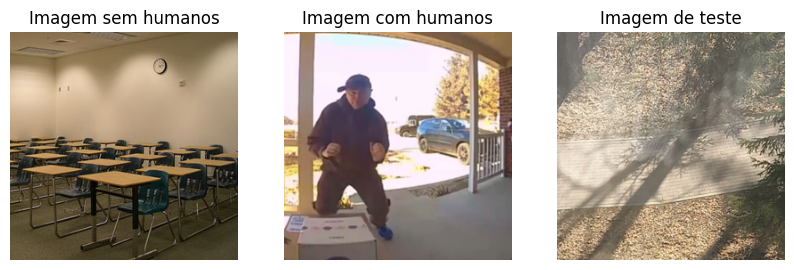

In [3]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.axis('off')
plt.title('Imagem sem humanos')
plt.imshow(x0)
plt.subplot(132)
plt.axis('off')
plt.title('Imagem com humanos')
plt.imshow(x1)
plt.subplot(133)
plt.axis('off')
plt.title('Imagem de teste')
plt.imshow(xtest)

In [4]:
def luminance(img):
    M, N, C = img.shape
    
    img_grayscale = np.zeros((M, N))
    
    for i in range(M):
        for j in range(N):
            red, green, blue, alpha = img[i, j]
            img_grayscale[i, j] = np.floor(red*0.299+green*0.587+blue*0.114)
            
    return img_grayscale

In [5]:
x0_grayscale = luminance(x0)
x1_grayscale = luminance(x1)
xtest_grayscale = luminance(xtest)

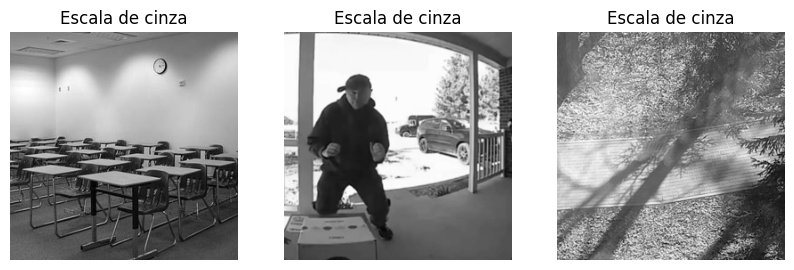

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.axis('off')
plt.title('Escala de cinza')
plt.imshow(x0_grayscale, cmap='gray')
plt.subplot(132)
plt.axis('off')
plt.title('Escala de cinza')
plt.imshow(x1_grayscale, cmap='gray')
plt.subplot(133)
plt.axis('off')
plt.title('Escala de cinza')
plt.imshow(xtest_grayscale, cmap='gray')

In [7]:
sobel_x = [[-1, -2, -1],
           [ 0,  0,  0],
           [ 1,  2,  1]]

sobel_y = [[-1,  0,  1],
           [-2,  0,  2],
           [-1,  0,  1]]

In [8]:
def gradient(img):
    g_x = ndimage.convolve(img, sobel_x)
    g_y = ndimage.convolve(img, sobel_y)
    return g_x, g_y

In [9]:
x0_gx, x0_gy = gradient(x0_grayscale)
x1_gx, x1_gy = gradient(x1_grayscale)
xtest_gx, xtest_gy = gradient(xtest_grayscale)

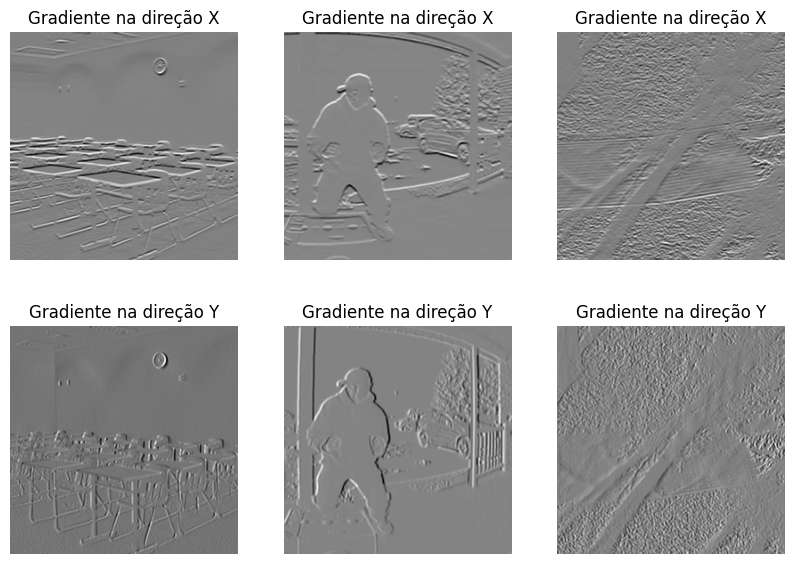

In [10]:
plt.figure(figsize=(10, 7))
plt.subplot(231)
plt.axis('off')
plt.title('Gradiente na direção X')
plt.imshow(x0_gx, cmap='gray')
plt.subplot(234)
plt.axis('off')
plt.title('Gradiente na direção Y')
plt.imshow(x0_gy, cmap='gray')
plt.subplot(232)
plt.axis('off')
plt.title('Gradiente na direção X')
plt.imshow(x1_gx, cmap='gray')
plt.subplot(235)
plt.axis('off')
plt.title('Gradiente na direção Y')
plt.imshow(x1_gy, cmap='gray')
plt.subplot(233)
plt.axis('off')
plt.title('Gradiente na direção X')
plt.imshow(xtest_gx, cmap='gray')
plt.subplot(236)
plt.axis('off')
plt.title('Gradiente na direção Y')
plt.imshow(xtest_gy, cmap='gray')

In [11]:
def magnitude(gx, gy):
    distance = np.sqrt(gx**2 + gy**2)
    m = distance/distance.sum()
    return m

In [12]:
x0_m = magnitude(x0_gx, x0_gy)
x1_m = magnitude(x1_gx, x1_gy)
xtest_m = magnitude(xtest_gx, xtest_gy)

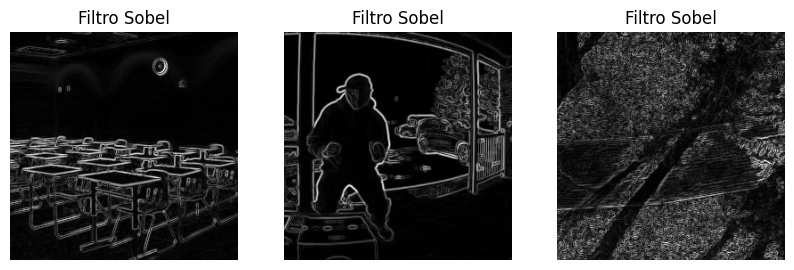

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.axis('off')
plt.title('Filtro Sobel')
plt.imshow(x0_m, cmap="gray")
plt.subplot(132)
plt.axis('off')
plt.title('Filtro Sobel')
plt.imshow(x1_m, cmap="gray")
plt.subplot(133)
plt.axis('off')
plt.title('Filtro Sobel')
plt.imshow(xtest_m, cmap="gray")

In [14]:
def angles(gx, gy):
    phi = np.arctan(gy/gx)
    return phi

In [15]:
np.seterr(divide='ignore', invalid='ignore')
x0_angles = angles(x0_gx, x0_gy)
x1_angles = angles(x1_gx, x1_gy)
xtest_angles = angles(xtest_gx, xtest_gy)

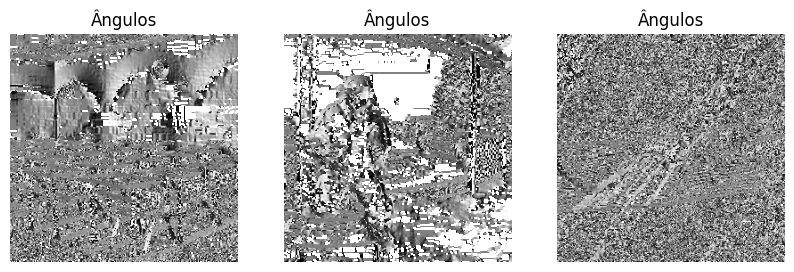

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.axis('off')
plt.title('Ângulos')
plt.imshow(x0_angles, cmap="gray")
plt.subplot(132)
plt.axis('off')
plt.title('Ângulos')
plt.imshow(x1_angles, cmap="gray")
plt.subplot(133)
plt.axis('off')
plt.title('Ângulos')
plt.imshow(xtest_angles, cmap="gray")

In [38]:
def descriptor(m, phi):
    phi_shift = phi + np.pi/2
    phi_degrees = np.degrees(phi_shift)
    phi_d = phi_degrees // 20
    
    d = np.zeros(180//20)
    
    M, N = phi_d.shape
    
    for x in range(M):
        for y in range(N):
            index = phi_d[x, y]
            if (not np.isnan(index) and index != 9):
                d[int(index)] += m[x, y]
    
    return d

In [37]:
x0_d = descriptor(x0_m, x0_angles)
x1_d = descriptor(x1_m, x1_angles)
xtest_d = descriptor(xtest_m, xtest_angles)

with np.printoptions(precision=3):
    print('Descritor da imagem sem humanos: %60s' % (x0_d))
    print('Descritor da imagem com humanos: %60s' % (x1_d))
    print('Descritor da imagem de teste: %63s' % (xtest_d))   

[0 8]
2.0
[0 6]
2.0
[0 8]
2.0
Descritor da imagem sem humanos:      [0.072 0.045 0.046 0.103 0.36  0.181 0.06  0.053 0.078]
Descritor da imagem com humanos:      [0.152 0.068 0.072 0.116 0.184 0.096 0.06  0.077 0.168]
Descritor da imagem de teste:         [0.08  0.08  0.093 0.121 0.167 0.152 0.125 0.099 0.081]


In [ ]:
plt.xticks(range(9))
plt.bar(range(9), x0_d,)

In [ ]:
def distance(a, b):
    d = np.sqrt(((a - b)**2).sum())
    return d

In [ ]:
print(distance(xtest_d, x0_d))
print(distance(xtest_d, x1_d))